# Xopt basic example

An Xopt problem can be described by a simple YAML file. Here we will demonstrate how this is used to optimize a well-known constrained multi-objective test function, TNK.

## TNK test function

The TNK function is defined with:

$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
# Import the class
from xopt import Xopt

In [2]:
!mkdir -p temp

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
# Make a proper input file.
YAML = """
xopt: {}
generator:
    name: random

evaluator:
    name: test_TNK
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE, y2: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    linked_variables: {x9: x1}
    constants: {a: dummy_constant}

"""

In [4]:
# create Xopt object.
X = Xopt(YAML)

# Run Random data generation

In [5]:
# Take one step (generate a single point)
X.step()

In [6]:
# examine the results
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,1.48822,1.618543,dummy_constant,1.48822,1.48822,1.618543,3.756148,2.227719,"[1, 2, 3]",False,


In [7]:
# take a couple of steps and examine the results
for _ in range(10):
    X.step()
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,1.488220,1.618543,dummy_constant,1.488220,1.488220,1.618543,3.756148,2.227719,"[1, 2, 3]",False,
2,1.857456,2.051770,dummy_constant,1.857456,1.857456,2.051770,6.589850,4.250677,"[1, 2, 3]",False,
3,2.517250,0.727516,dummy_constant,2.517250,2.517250,0.727516,5.886755,4.121060,"[1, 2, 3]",False,
4,2.250318,0.540588,dummy_constant,2.250318,2.250318,0.540588,4.436938,3.065262,"[1, 2, 3]",False,
5,1.685252,2.885718,dummy_constant,1.685252,1.685252,2.885718,10.224165,7.096472,"[1, 2, 3]",False,
6,0.651194,1.797049,dummy_constant,0.651194,0.651194,1.797049,2.578308,1.705195,"[1, 2, 3]",False,
7,1.341000,0.644417,dummy_constant,1.341000,1.341000,0.644417,1.150170,0.728138,"[1, 2, 3]",False,
8,0.696819,1.497032,dummy_constant,0.696819,0.696819,1.497032,1.649351,1.032810,"[1, 2, 3]",False,
9,1.762796,0.057868,dummy_constant,1.762796,1.762796,0.057868,2.024269,1.790135,"[1, 2, 3]",False,
10,0.287910,1.534283,dummy_constant,0.287910,0.287910,1.534283,1.535411,1.114723,"[1, 2, 3]",False,


# Plotting
Plot the objective results

<AxesSubplot:xlabel='y1', ylabel='y2'>

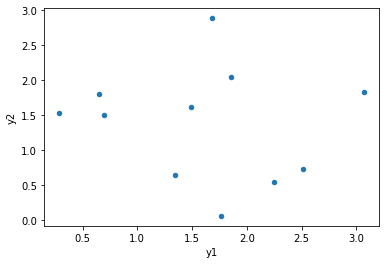

In [8]:
import matplotlib.pyplot as plt

X.data.plot(*X.vocs.objective_names, kind="scatter")

In [9]:
# Cleanup
!rm -r temp

# Alternative initialiation methods

For convenience, if the first (and only) positional argument is present, then Xopt will automatically try to load from JSON, YAML str or files, or as a dict.

In [10]:
import yaml
import json

config  = yaml.safe_load(YAML) 
# All these methods work

X = Xopt(YAML)
X = Xopt(config)
X = Xopt(json.dumps(config, indent=4))
